# Entrega 4 - Analysing the stock prices and sentiment concerning Apple Inc.

As we are dealing with lots of data, we decided to focus only on one company and analyse the sentiment of the news, as well as the stock market close price. We chose Apple, as it's well-known and often mentioned in media.

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
from pathlib import Path
import numpy as np

## Reading the dataset

We started with reading the whole dataset with the sentiment imputed. Then we extracted the AAPL column, as it's the only one we are goin to use.

In [114]:
# get all the files
files = os.listdir("../../data/processed/")
files = [f for f in files if f.startswith("dataset_completo_con_sentimientos_parte") and f.endswith(".csv")]

for idx, file in enumerate(files): 
    # read the file
    path = Path('../../data/processed') / file
    df2 = pd.read_csv(path, encoding="utf-8")

    # save as a global variable
    globals()[f'FULL_sentimiento_{idx}'] = df2
    print(f"File {file} processed")


File dataset_completo_con_sentimientos_parte_0.csv processed
File dataset_completo_con_sentimientos_parte_1.csv processed
File dataset_completo_con_sentimientos_parte_2.csv processed
File dataset_completo_con_sentimientos_parte_3.csv processed
File dataset_completo_con_sentimientos_parte_4.csv processed
File dataset_completo_con_sentimientos_parte_5.csv processed
File dataset_completo_con_sentimientos_parte_6.csv processed
File dataset_completo_con_sentimientos_parte_7.csv processed
File dataset_completo_con_sentimientos_parte_8.csv processed


In [115]:
df_FULL_sentimiento = pd.concat([FULL_sentimiento_0, FULL_sentimiento_1, FULL_sentimiento_2, FULL_sentimiento_3, FULL_sentimiento_4, FULL_sentimiento_5, FULL_sentimiento_6, FULL_sentimiento_7, FULL_sentimiento_8], ignore_index=True)

In [4]:
df_FULL_sentimiento.sample(5)

,Unnamed: 0.1,Unnamed: 0,Date,AAL,AAME,AAON,AAPL,AAXJ,ABCB,ABIO,...,XOMA,XRAY,XTLB,YNDX,YORW,ZBRA,ZEUS,ZION,ZIV,ZUMZ
814,814,814,2014-05-07 00:00:00+00:00,{'val_adj_close': 35.09},{'val_adj_close': 3.35},{'val_adj_close': 12.52},{'val_adj_close': 18.59},{'val_adj_close': 52.15},{'val_adj_close': 18.61},{'val_adj_close': 2237.74},...,{'val_adj_close': 84.2},{'val_adj_close': 43.49},{'val_adj_close': 16.9},{'val_adj_close': 27.27},{'val_adj_close': 16.95},{'val_adj_close': 74.72},{'val_adj_close': 22.99},{'val_adj_close': 22.48},{'val_adj_close': 40.97},{'val_adj_close': 24.82}
141,141,141,2012-07-25 00:00:00+00:00,{'val_adj_close': 10.51},{'val_adj_close': 2.52},{'val_adj_close': 4.81},{'val_adj_close': 17.34},{'val_adj_close': 43.28},{'val_adj_close': 10.69},{'val_adj_close': 4717.4},...,{'val_adj_close': 69.6},{'val_adj_close': 33.74},{'val_adj_close': 40.5},{'val_adj_close': 19.0},{'val_adj_close': 14.67},{'val_adj_close': 34.97},{'val_adj_close': 14.49},{'val_adj_close': 13.88},{'val_adj_close': 15.87},{'val_adj_close': 35.47}
1642,1642,1642,2017-08-18 00:00:00+00:00,{'val_adj_close': 44.3},{'val_adj_close': 3.38},{'val_adj_close': 20.21},"{'val_adj_close': 36.96, 'noticias': [{'notici...",{'val_adj_close': 65.4},{'val_adj_close': 40.98},{'val_adj_close': 275.4},...,{'val_adj_close': 7.52},{'val_adj_close': 51.16},{'val_adj_close': 2.75},{'val_adj_close': 29.81},{'val_adj_close': 30.25},{'val_adj_close': 102.92},{'val_adj_close': 16.72},{'val_adj_close': 35.32},{'val_adj_close': 69.68},{'val_adj_close': 11.9}
2083,2083,2083,2019-05-22 00:00:00+00:00,{'val_adj_close': 29.61},{'val_adj_close': 2.45},{'val_adj_close': 30.18},"{'val_adj_close': 44.05, 'noticias': [{'notici...",{'val_adj_close': 64.03},{'val_adj_close': 34.69},{'val_adj_close': 86.04},...,{'val_adj_close': 17.23},{'val_adj_close': 53.65},{'val_adj_close': 2.38},{'val_adj_close': 37.65},{'val_adj_close': 34.47},{'val_adj_close': 174.53},{'val_adj_close': 13.87},{'val_adj_close': 37.86},{'val_adj_close': 73.51},"{'val_adj_close': 21.22, 'noticias': [{'notici..."
2100,2100,2100,2019-06-17 00:00:00+00:00,{'val_adj_close': 32.22},{'val_adj_close': 2.38},{'val_adj_close': 31.43},"{'val_adj_close': 46.73, 'noticias': [{'notici...",{'val_adj_close': 64.44},{'val_adj_close': 36.32},{'val_adj_close': 76.8},...,{'val_adj_close': 17.07},{'val_adj_close': 55.65},{'val_adj_close': 2.05},{'val_adj_close': 38.36},{'val_adj_close': 33.4},{'val_adj_close': 192.99},{'val_adj_close': 12.17},{'val_adj_close': 36.71},{'val_adj_close': 73.3},{'val_adj_close': 23.64}


In [5]:
df_FULL_sentimiento.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [6]:
df_FULL_sentimiento.shape

(2259, 1150)

In [7]:
df_FULL_sentimiento.sample(5)

,Date,AAL,AAME,AAON,AAPL,AAXJ,ABCB,ABIO,ACAD,ACFN,...,XOMA,XRAY,XTLB,YNDX,YORW,ZBRA,ZEUS,ZION,ZIV,ZUMZ
1411,2016-09-19 00:00:00+00:00,{'val_adj_close': 34.16},{'val_adj_close': 3.17},{'val_adj_close': 17.9},"{'val_adj_close': 26.19, 'noticias': [{'notici...",{'val_adj_close': 54.77},{'val_adj_close': 33.11},{'val_adj_close': 637.19},{'val_adj_close': 34.82},{'val_adj_close': 0.19},...,{'val_adj_close': 10.8},{'val_adj_close': 57.5},{'val_adj_close': 5.2},{'val_adj_close': 20.77},{'val_adj_close': 27.01},{'val_adj_close': 68.77},"{'val_adj_close': 19.08, 'noticias': [{'notici...",{'val_adj_close': 23.84},{'val_adj_close': 41.63},{'val_adj_close': 17.32}
1144,2015-08-27 00:00:00+00:00,{'val_adj_close': 37.22},{'val_adj_close': 3.42},{'val_adj_close': 12.92},"{'val_adj_close': 25.49, 'noticias': [{'notici...",{'val_adj_close': 48.67},{'val_adj_close': 24.8},{'val_adj_close': 1354.74},{'val_adj_close': 37.91},{'val_adj_close': 0.17},...,{'val_adj_close': 16.6},{'val_adj_close': 51.02},{'val_adj_close': 8.95},{'val_adj_close': 12.08},{'val_adj_close': 18.67},{'val_adj_close': 83.7},{'val_adj_close': 12.17},{'val_adj_close': 22.73},{'val_adj_close': 41.81},{'val_adj_close': 23.54}
1789,2018-03-21 00:00:00+00:00,{'val_adj_close': 52.82},{'val_adj_close': 3.19},{'val_adj_close': 25.07},"{'val_adj_close': 40.5, 'noticias': [{'noticia...",{'val_adj_close': 75.38},{'val_adj_close': 53.2},{'val_adj_close': 133.92},{'val_adj_close': 24.66},{'val_adj_close': 0.29},...,{'val_adj_close': 21.82},{'val_adj_close': 52.62},{'val_adj_close': 1.8},{'val_adj_close': 43.21},{'val_adj_close': 29.49},{'val_adj_close': 143.46},{'val_adj_close': 21.75},{'val_adj_close': 44.64},{'val_adj_close': 68.25},{'val_adj_close': 23.95}
1515,2017-02-16 00:00:00+00:00,{'val_adj_close': 45.49},{'val_adj_close': 3.8},{'val_adj_close': 22.2},"{'val_adj_close': 31.51, 'noticias': [{'notici...",{'val_adj_close': 56.35},{'val_adj_close': 45.69},{'val_adj_close': 540.0},{'val_adj_close': 39.22},{'val_adj_close': 0.31},...,{'val_adj_close': 5.15},{'val_adj_close': 58.63},"{'val_adj_close': 3.58, 'noticias': [{'noticia...","{'val_adj_close': 24.49, 'noticias': [{'notici...",{'val_adj_close': 32.1},{'val_adj_close': 85.23},{'val_adj_close': 24.64},{'val_adj_close': 35.94},{'val_adj_close': 56.59},{'val_adj_close': 19.8}
646,2013-09-05 00:00:00+00:00,{'val_adj_close': 16.02},{'val_adj_close': 3.72},{'val_adj_close': 9.89},{'val_adj_close': 15.36},{'val_adj_close': 49.08},{'val_adj_close': 17.68},{'val_adj_close': 2026.07},{'val_adj_close': 21.2},{'val_adj_close': 6.05},...,{'val_adj_close': 91.8},{'val_adj_close': 40.2},{'val_adj_close': 30.95},"{'val_adj_close': 34.67, 'noticias': [{'notici...",{'val_adj_close': 16.31},{'val_adj_close': 45.93},{'val_adj_close': 25.53},{'val_adj_close': 22.55},{'val_adj_close': 31.43},"{'val_adj_close': 25.29, 'noticias': [{'notici..."


In [8]:
df_apple = df_FULL_sentimiento.loc[:, ['Date', 'AAPL']]

In [9]:
df_apple

,Date,AAPL
0,2012-01-03 00:00:00+00:00,{'val_adj_close': 12.4}
1,2012-01-04 00:00:00+00:00,{'val_adj_close': 12.47}
2,2012-01-05 00:00:00+00:00,{'val_adj_close': 12.61}
3,2012-01-06 00:00:00+00:00,{'val_adj_close': 12.74}
4,2012-01-09 00:00:00+00:00,{'val_adj_close': 12.72}
...,...,...
2254,2020-01-27 00:00:00+00:00,{'val_adj_close': 74.96}
2255,2020-01-28 00:00:00+00:00,{'val_adj_close': 77.08}
2256,2020-01-29 00:00:00+00:00,{'val_adj_close': 78.7}
2257,2020-01-30 00:00:00+00:00,{'val_adj_close': 78.58}


In [10]:
df_apple.shape

(2259, 2)

## Extracting the sentiment and close value

While extracting the news and their sentiment, we realized that there are several rows with no news at all. It turned out, that even though our stock data goes from 2012, the first news concerning Apple appear in 2015. Similarly, the stock data goes into 2021, but the last encountered news are dated in 2020. 

### First attempt - imputing the sentiment.

At first we decided to imput the missing sentiment with 0, as this value shouldn't influence our data. However, when it came to dividing the data into test and train subsets, it turned out that the whole train dataset had sentiment of value 0. 

In [11]:
# the AAPL column contains a dictionary {'val_adj_close': value} and I only want the value
df_apple['Close'] = df_apple['AAPL'].apply(lambda x: ast.literal_eval(x)['val_adj_close'])
df_apple

,Date,AAPL,Close
0,2012-01-03 00:00:00+00:00,{'val_adj_close': 12.4},12.40
1,2012-01-04 00:00:00+00:00,{'val_adj_close': 12.47},12.47
2,2012-01-05 00:00:00+00:00,{'val_adj_close': 12.61},12.61
3,2012-01-06 00:00:00+00:00,{'val_adj_close': 12.74},12.74
4,2012-01-09 00:00:00+00:00,{'val_adj_close': 12.72},12.72
...,...,...,...
2254,2020-01-27 00:00:00+00:00,{'val_adj_close': 74.96},74.96
2255,2020-01-28 00:00:00+00:00,{'val_adj_close': 77.08},77.08
2256,2020-01-29 00:00:00+00:00,{'val_adj_close': 78.7},78.70
2257,2020-01-30 00:00:00+00:00,{'val_adj_close': 78.58},78.58


In [117]:
def extract_sentiments_with_date_for_apple(df, column_data):
    sentiment_data = []
    for idx, entry in column_data.items(): # go through all the rows in the column
        try:
            # change the string to a dictionary
            data = ast.literal_eval(entry)
            if isinstance(data, dict) and 'noticias' in data:
                # extract the sentiment data from the dictionary
                for noticia in data['noticias']:
                    if 'sentimiento' in noticia:
                        sentiment_data.append({"date": df.loc[idx, "Date"],  # extract the date
                                                "sentimiento": noticia["sentimiento"]})
        except (ValueError, SyntaxError):
            continue
    return sentiment_data


In [13]:
file_sentiments_with_dates = []

for column in df_apple.columns:
    if column not in ['Date']:  
        sentiments = extract_sentiments_with_date_for_apple(df_apple, df_apple[column])
        file_sentiments_with_dates.extend(sentiments)  

df_sentimiento = pd.DataFrame(file_sentiments_with_dates)

In [118]:
def input_missing_sentiment(df, column_data):
    no_sentiment_data = []
    for idx, entry in column_data.items():
        try:
            data = ast.literal_eval(entry)
            
            if isinstance(data, dict) and 'noticias' not in data:
                no_sentiment_data.append({
                    "date": df.loc[idx, "Date"],
                    "sentimiento": '-'
                })
                
        except (ValueError, SyntaxError):  
            continue
    return no_sentiment_data


In [15]:
file_no_sentiment = []

for column in df_apple.columns:
    if column != 'Date': 
        try:
            if df_apple[column].dropna().any():
                sentiments = input_missing_sentiment(df_apple, df_apple[column].dropna())
                file_no_sentiment.extend(sentiments)  
            else:
                print(f"Brak danych w kolumnie: {column}")
        except Exception as e:
            print(f"Błąd podczas przetwarzania kolumny: {column}. Błąd: {e}")

df_no_sentimiento = pd.DataFrame(file_no_sentiment)

In [16]:
df_no_sentimiento

,date,sentimiento
0,2012-01-03 00:00:00+00:00,-
1,2012-01-04 00:00:00+00:00,-
2,2012-01-05 00:00:00+00:00,-
3,2012-01-06 00:00:00+00:00,-
4,2012-01-09 00:00:00+00:00,-
...,...,...
909,2020-01-27 00:00:00+00:00,-
910,2020-01-28 00:00:00+00:00,-
911,2020-01-29 00:00:00+00:00,-
912,2020-01-30 00:00:00+00:00,-


In [17]:
df_sentimiento

,date,sentimiento
0,2020-03-09 00:00:00+00:00,positive
1,2020-03-09 00:00:00+00:00,neutral
2,2020-03-09 00:00:00+00:00,neutral
3,2020-03-10 00:00:00+00:00,neutral
4,2020-03-10 00:00:00+00:00,negative
...,...,...
623946,2019-12-31 00:00:00+00:00,positive
623947,2019-12-31 00:00:00+00:00,positive
623948,2019-12-31 00:00:00+00:00,neutral
623949,2019-12-31 00:00:00+00:00,neutral


In [18]:
# concat df_sentimiento and df_no_sentimiento
df_sentimiento_imputed = pd.concat([df_sentimiento, df_no_sentimiento], ignore_index=True)

In [19]:
# order df by dates
df_sentimiento_imputed.sort_values(by='date', inplace=True, ignore_index=True)
df_sentimiento_imputed

,date,sentimiento
0,2012-01-03 00:00:00+00:00,-
1,2012-01-04 00:00:00+00:00,-
2,2012-01-05 00:00:00+00:00,-
3,2012-01-06 00:00:00+00:00,-
4,2012-01-09 00:00:00+00:00,-
...,...,...
624860,2020-12-17 00:00:00+00:00,-
624861,2020-12-18 00:00:00+00:00,-
624862,2020-12-21 00:00:00+00:00,-
624863,2020-12-22 00:00:00+00:00,-


In [20]:
# encode the sentimiento column - 0 if neutral, 1 if positive, -1 if negative
df_sentimiento_imputed['sentimiento'] = df_sentimiento_imputed['sentimiento'].map({'neutral': 0, '-': 0, 'positive': 1, 'negative': -1})

In [21]:
df_sentimiento_imputed

,date,sentimiento
0,2012-01-03 00:00:00+00:00,0.0
1,2012-01-04 00:00:00+00:00,0.0
2,2012-01-05 00:00:00+00:00,0.0
3,2012-01-06 00:00:00+00:00,0.0
4,2012-01-09 00:00:00+00:00,0.0
...,...,...
624860,2020-12-17 00:00:00+00:00,0.0
624861,2020-12-18 00:00:00+00:00,0.0
624862,2020-12-21 00:00:00+00:00,0.0
624863,2020-12-22 00:00:00+00:00,0.0


In [22]:
df_sentimiento_imputed_grouped = df_sentimiento_imputed.groupby('date').sum()

In [23]:
df_sentimiento_imputed_grouped.sample(10)

,sentimiento
date,
2014-05-21 00:00:00+00:00,0.0
2013-08-27 00:00:00+00:00,0.0
2019-12-17 00:00:00+00:00,4.0
2019-12-18 00:00:00+00:00,85.0
2012-12-20 00:00:00+00:00,0.0
2015-06-08 00:00:00+00:00,-3.0
2013-03-25 00:00:00+00:00,0.0
2015-12-22 00:00:00+00:00,-4.0
2013-01-25 00:00:00+00:00,0.0


In [24]:
len(df_sentimiento_imputed_grouped), len(df_apple)

(2259, 2259)

In [25]:
# merge df apple and df_sentimiento_grouped
df_apple_sentimiento_imputed = df_apple.merge(df_sentimiento_imputed_grouped, how='left', left_on='Date', right_on='date')

In [26]:
df_apple_sentimiento_imputed.drop(columns='AAPL', inplace=True)

In [27]:
df_apple_sentimiento_imputed.columns = ['Date', 'Close', 'Sentiment']

In [28]:
df_apple_sentimiento_imputed.sample(5)

,Date,Close,Sentiment
1079,2015-05-27 00:00:00+00:00,29.68,64.0
1389,2016-08-17 00:00:00+00:00,25.19,-7.0
1100,2015-06-25 00:00:00+00:00,28.66,-1.0
934,2014-10-27 00:00:00+00:00,23.33,0.0
1567,2017-05-03 00:00:00+00:00,34.23,-4.0


In [ ]:
# order apple_sentimiento by date
df_apple_sentimiento_imputed.sort_values(by='Date', inplace=True, ignore_index=True)

In [30]:
# save the data to a csv file
df_apple_sentimiento_imputed.to_csv('../../data/processed/apple_sentimiento_imputed.csv', index=False)

In [255]:
# load the data
df_apple_sentimiento_imputed = pd.read_csv('../../data/processed/apple_sentimiento_imputed.csv')

### Second attempt - without imputing the sentiment

As imputing the values did not have sense, we tried to drop all the rows without data. However, we did not realize that there was also missing data in the middle of our timeline and droping it resulted in unstabilities while plotting the stock values.

In [31]:
# sort df_sentimientoby date
df_sentimiento.sort_values(by='date', inplace=True, ignore_index=True)

In [32]:
df_sentimiento

,date,sentimiento
0,2015-01-02 00:00:00+00:00,neutral
1,2015-01-02 00:00:00+00:00,neutral
2,2015-01-02 00:00:00+00:00,positive
3,2015-01-02 00:00:00+00:00,neutral
4,2015-01-02 00:00:00+00:00,neutral
...,...,...
623946,2020-07-16 00:00:00+00:00,neutral
623947,2020-07-16 00:00:00+00:00,neutral
623948,2020-07-16 00:00:00+00:00,neutral
623949,2020-07-16 00:00:00+00:00,neutral


In [33]:
# map the sentiment to the values
df_sentimiento['sentimiento'] = df_sentimiento['sentimiento'].map({'neutral': 0, 'positive': 1, 'negative': -1})

In [34]:
df_sentimiento

,date,sentimiento
0,2015-01-02 00:00:00+00:00,0.0
1,2015-01-02 00:00:00+00:00,0.0
2,2015-01-02 00:00:00+00:00,1.0
3,2015-01-02 00:00:00+00:00,0.0
4,2015-01-02 00:00:00+00:00,0.0
...,...,...
623946,2020-07-16 00:00:00+00:00,0.0
623947,2020-07-16 00:00:00+00:00,0.0
623948,2020-07-16 00:00:00+00:00,0.0
623949,2020-07-16 00:00:00+00:00,0.0


In [35]:
# group by date
df_sentimiento = df_sentimiento.groupby('date').sum()

In [36]:
# now the date is the index and I want it as column
df_sentimiento.reset_index(inplace=True)

In [37]:
df_sentimiento

,date,sentimiento
0,2015-01-02 00:00:00+00:00,-38.0
1,2015-01-05 00:00:00+00:00,-67.0
2,2015-01-06 00:00:00+00:00,-17.0
3,2015-01-07 00:00:00+00:00,-2.0
4,2015-01-08 00:00:00+00:00,115.0
...,...,...
1340,2020-07-10 00:00:00+00:00,263.0
1341,2020-07-13 00:00:00+00:00,605.0
1342,2020-07-14 00:00:00+00:00,233.0
1343,2020-07-15 00:00:00+00:00,389.0


In [38]:
# concat df_apple and df_sentimiento
df_apple_sentimiento = df_apple.merge(df_sentimiento, how='right', left_on='Date', right_on='date')

In [39]:
df_apple_sentimiento.drop(columns=['AAPL', 'date'], inplace=True)

In [40]:
df_apple_sentimiento.columns = ['Date', 'Close', 'Sentiment']

In [41]:
df_apple_sentimiento

,Date,Close,Sentiment
0,2015-01-02 00:00:00+00:00,24.37,-38.0
1,2015-01-05 00:00:00+00:00,23.69,-67.0
2,2015-01-06 00:00:00+00:00,23.69,-17.0
3,2015-01-07 00:00:00+00:00,24.02,-2.0
4,2015-01-08 00:00:00+00:00,24.94,115.0
...,...,...,...
1340,2020-07-10 00:00:00+00:00,93.57,263.0
1341,2020-07-13 00:00:00+00:00,93.14,605.0
1342,2020-07-14 00:00:00+00:00,94.68,233.0
1343,2020-07-15 00:00:00+00:00,95.33,389.0


In [42]:
# save the data to a csv file
df_apple_sentimiento.to_csv('../../data/processed/apple_sentimiento.csv', index=False)

In [256]:
# read the data
df_apple_sentimiento = pd.read_csv('../../data/processed/apple_sentimiento.csv')

### Final attempt


Finally we decided to cut the dataframe short, using the firt non-zero value as start and last non-zero value as the end of the timeline. We  only imputed the data in between those values.

In [19]:
df_apple_sentimiento

,Date,Close,Sentiment
0,2015-01-02 00:00:00+00:00,24.37,-38.0
1,2015-01-05 00:00:00+00:00,23.69,-67.0
2,2015-01-06 00:00:00+00:00,23.69,-17.0
3,2015-01-07 00:00:00+00:00,24.02,-2.0
4,2015-01-08 00:00:00+00:00,24.94,115.0
...,...,...,...
1340,2020-07-10 00:00:00+00:00,93.57,263.0
1341,2020-07-13 00:00:00+00:00,93.14,605.0
1342,2020-07-14 00:00:00+00:00,94.68,233.0
1343,2020-07-15 00:00:00+00:00,95.33,389.0


In [257]:
# concat the two dataframes into one
df = df_apple_sentimiento_imputed

In [258]:
# get min and max date from apple_sentimiento
df_apple_sentimiento['Date'].min(), df_apple_sentimiento['Date'].max()

('2015-01-02 00:00:00+00:00', '2020-07-16 00:00:00+00:00')

In [259]:
# drop dates before 2-01-2015 and after 16-07-2020
df = df[(df['Date'] >= '2015-01-02') & (df['Date'] <= '2020-07-16')]

In [260]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\48726\AppData\Local\Temp\ipykernel_13780\2394721818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


## Plotting the data

When the data was extracted and imputed corectly, there came the time to plot the data.

As our timeline starts in 2015, we only focused on important dates concerning Donald Trump. In red, there are marked in order, the days of USA Elections (08-11-2016) and Trump's inaugaration (20-01-2017).

### Overall plots

##### Sentiment and Close Price

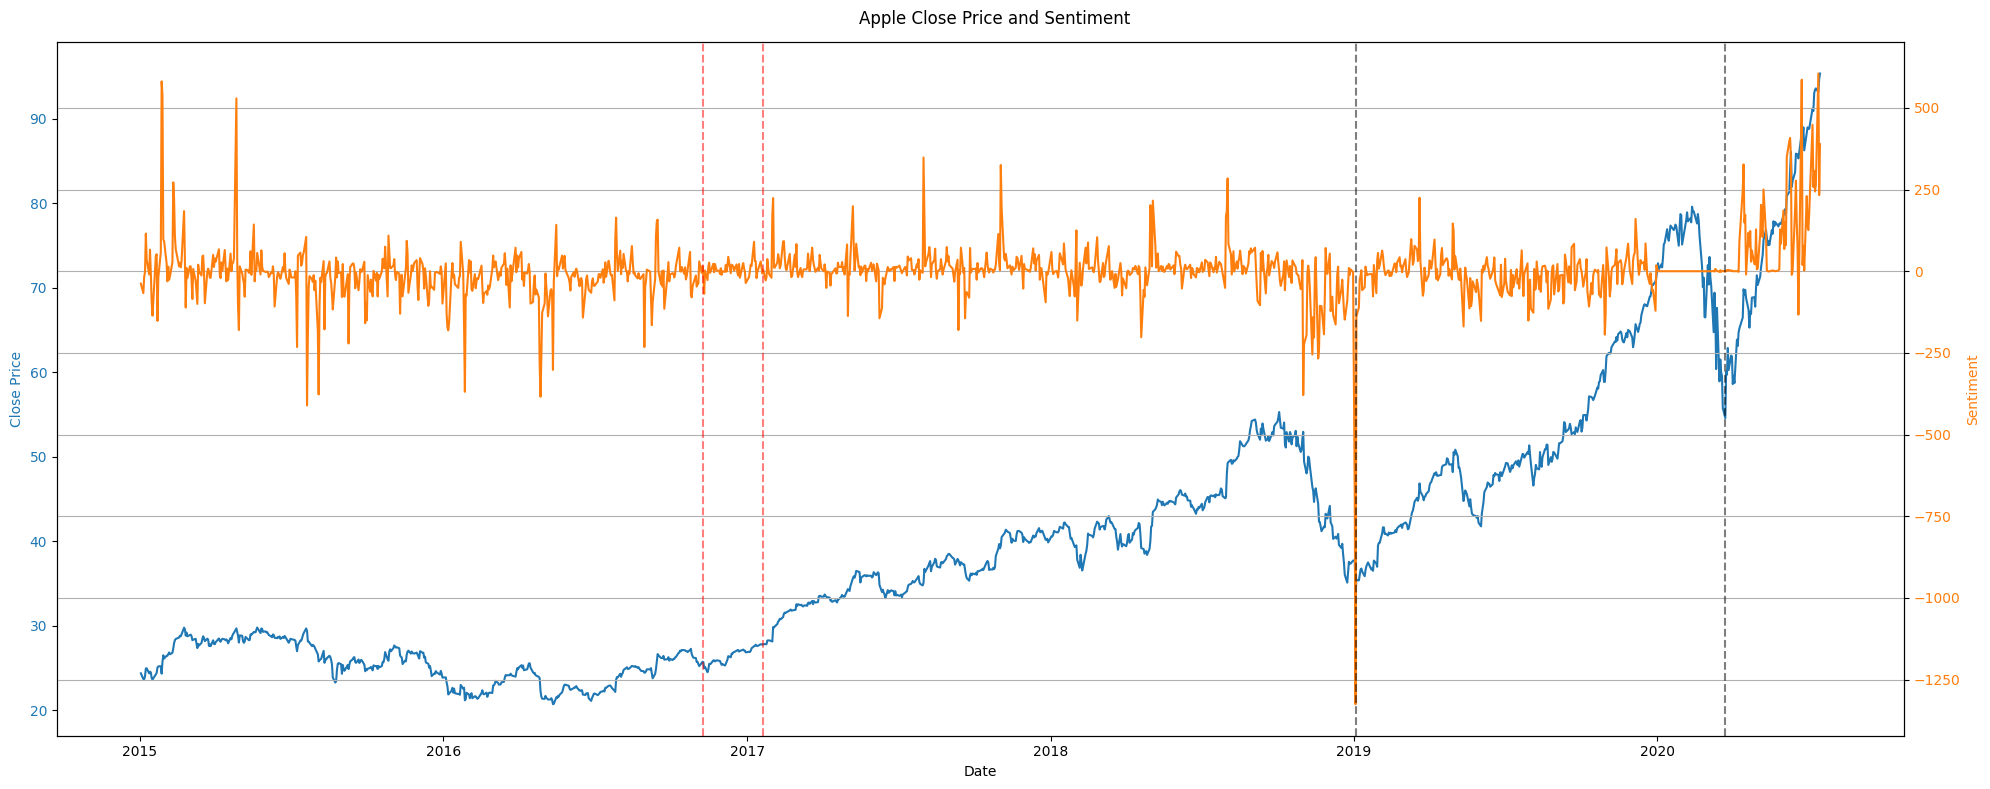

In [261]:
fig, ax1 = plt.subplots(figsize=(20, 8))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(df['Date'], df['Close'], label='Close Price', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Sentiment', color=color)
ax2.plot(df['Date'], df['Sentiment'], label='Sentiment', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axvline(x=pd.Timestamp('2016-11-08').date(), color='r', linestyle='--', alpha=0.5) # Wybory
plt.axvline(x=pd.Timestamp('2017-01-20').date(), color='r', linestyle='--', alpha=0.5) # Inauguracja Trumpa
plt.axvline(x=pd.Timestamp('2019-01-03').date(), color='k', linestyle='--', alpha=0.5) # 
plt.axvline(x=pd.Timestamp('2020-03-23').date(), color='k', linestyle='--', alpha=0.5) # Spadek


fig.suptitle('Apple Close Price and Sentiment')
fig.tight_layout()
plt.grid()
plt.show()


We noticed a few low values and decided to check them out. We marked them in black at our plot.

##### January 3rd,  2019

In [68]:
min2019 = df[df['Date'].dt.year == 2019]['Close'].min()
df[(df['Date'].dt.year == 2019) & (df['Close'] == min2019)]

,Date,Close,Sentiment
1761,2019-01-03 00:00:00+00:00,33.99,-1325.0


According to the internet, on January 3, 2019, Apple's stock price dropped sharply because the company lowered its revenue forecasts. This was mainly due to weak iPhone sales in China and concerns about a slowing Chinese economy. Financial news reported this widely, and investors became worried about Apple's future growth. 

As it can be seen on the plot of sentiment, January 3rd, 2019 is a day with a signifficantly low sentiment value. At first in may appear to be an outlier, but when we take into account what stated earlier, it seems to be perfectly reasonable. There was a lot of negative news concerning the company and the overal sentiment of value $-1325$ is perfectly explicable.

##### March 23rd, 2020

In [ ]:
min2020 = df[df['Date'].dt.year == 2020]['Close'].min()
df[(df['Date'].dt.year == 2020) & (df['Close'] == min2020)]

,Date,Close,Sentiment
2066,2020-03-23 00:00:00+00:00,54.57,-1.0


In [239]:
# get the value of month before
df[(df['Date'] == '2020-02-24')] 

,Date,Close,Sentiment
2046,2020-02-24 00:00:00+00:00,72.52,0.0


In [240]:
# the value of two months before
df[(df['Date'] == '2020-01-23')]

,Date,Close,Sentiment
2026,2020-01-23 00:00:00+00:00,77.46,0.0


In [244]:
df[(df['Date'] == '2020-03-16')]

,Date,Close,Sentiment
2061,2020-03-16 00:00:00+00:00,58.91,-2.0


When it comes to this date, the close price is not as low, however the drop is visible and significant, especially if we comapre it with the values from January and February. This time it does not concern an Apple comany itself, but the global COVID-19 pandemic.

The drop happened as markets panicked over the virus, and investors feared disruptions to Apple's supply chain and product sales. We can see that there are practicaly no financial news and tweets from that time, and it may also be a result of the pandemic, as the society focuesed on more serious topics.

We can actually see that the stock values started to drop just after the beggining of pandemic.

In [252]:
df[(df['Date'] >= '2020-03-12') & (df['Date'] <= '2020-03-23')]

,Date,Close,Sentiment
2059,2020-03-12 00:00:00+00:00,60.37,4.0
2060,2020-03-13 00:00:00+00:00,67.61,1.0
2061,2020-03-16 00:00:00+00:00,58.91,-2.0
2062,2020-03-17 00:00:00+00:00,61.50,3.0
2063,2020-03-18 00:00:00+00:00,59.99,-2.0
2064,2020-03-19 00:00:00+00:00,59.53,1.0
2065,2020-03-20 00:00:00+00:00,55.75,1.0
2066,2020-03-23 00:00:00+00:00,54.57,-1.0


However in this case, neither stock influenced the news, nor the other way around. Those changes are also not connected to USA government. The reason is clearly the pandemic.

#### Close Price

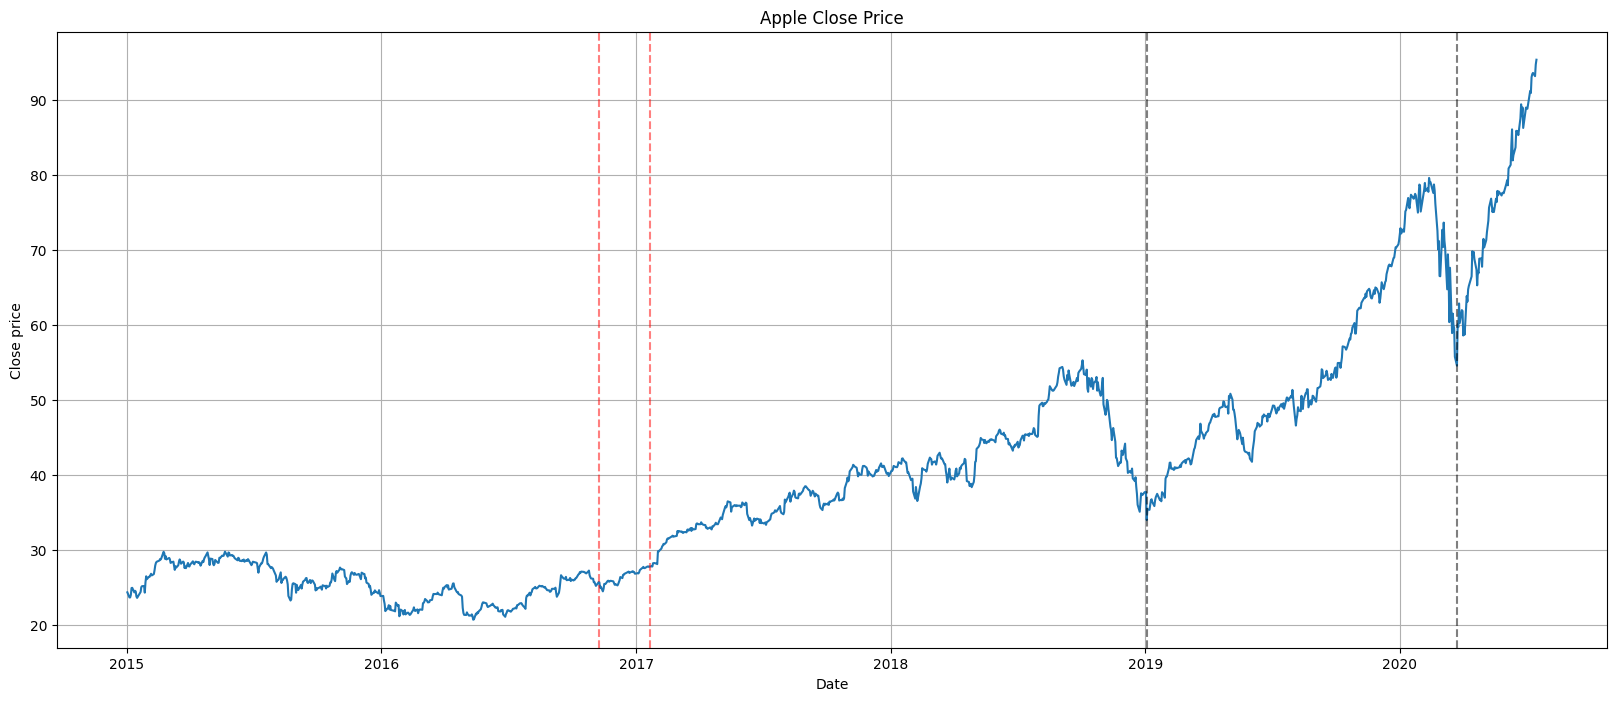

In [262]:
import matplotlib.dates as mdates

plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['Close'])
plt.title("Apple Close Price")
plt.xlabel("Date")
plt.ylabel("Close price")

plt.axvline(x=pd.Timestamp('2016-11-08').date(), color='r', linestyle='--', alpha=0.5) # Wybory
plt.axvline(x=pd.Timestamp('2017-01-20').date(), color='r', linestyle='--', alpha=0.5) # Inauguracja Trumpa
plt.axvline(x=pd.Timestamp('2019-01-03').date(), color='k', linestyle='--', alpha=0.5) # 
plt.axvline(x=pd.Timestamp('2020-03-23').date(), color='k', linestyle='--', alpha=0.5) # Spadek

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=0)
plt.grid()
plt.show()

#### Sentiment

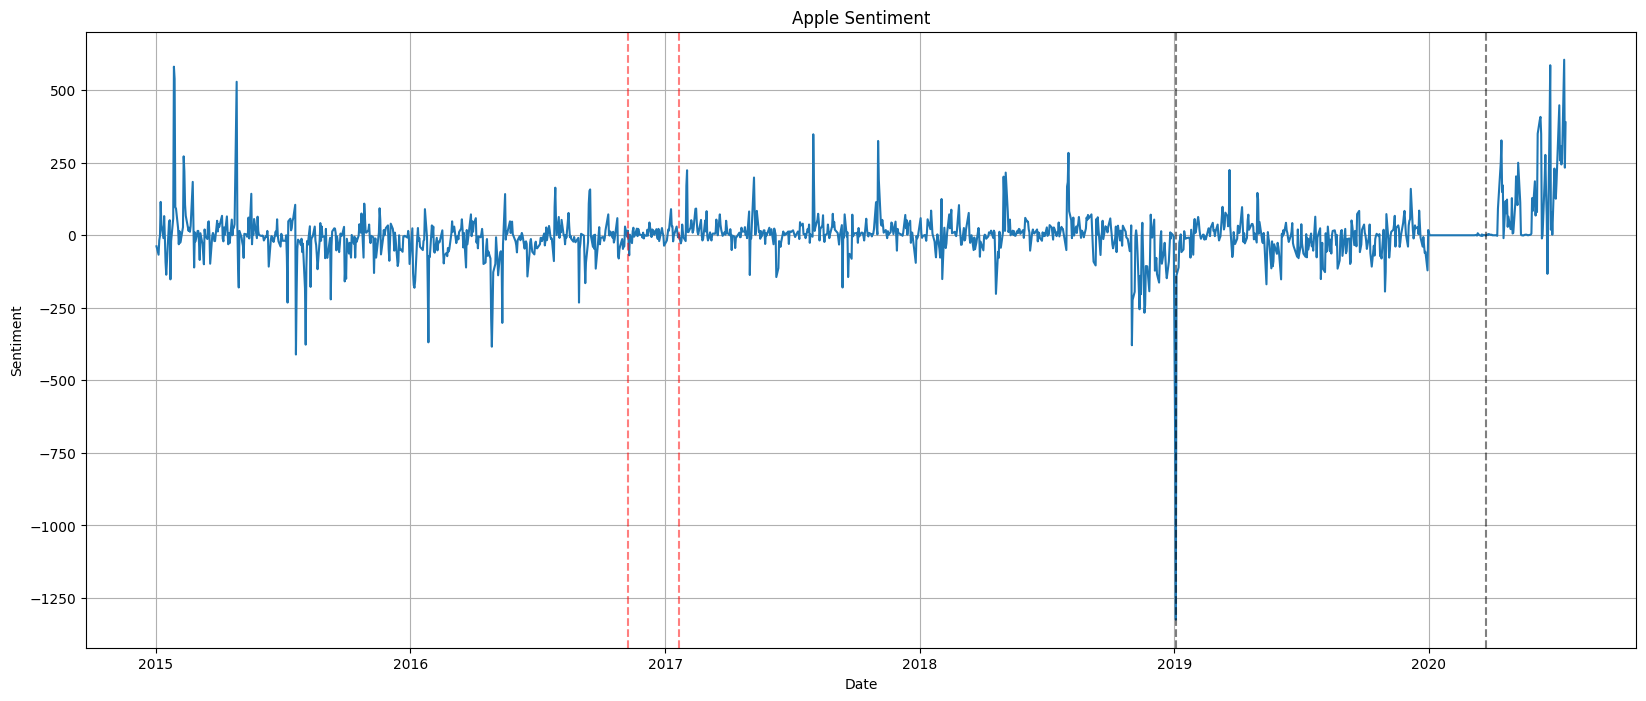

In [263]:
plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['Sentiment'])
plt.title("Apple Sentiment")
plt.xlabel("Date")
plt.ylabel("Sentiment")

plt.axvline(x=pd.Timestamp('2016-11-08').date(), color='r', linestyle='--', alpha=0.5) # Wybory
plt.axvline(x=pd.Timestamp('2017-01-20').date(), color='r', linestyle='--', alpha=0.5) # Inauguracja Trumpa
plt.axvline(x=pd.Timestamp('2019-01-03').date(), color='k', linestyle='--', alpha=0.5) # 
plt.axvline(x=pd.Timestamp('2020-03-23').date(), color='k', linestyle='--', alpha=0.5) # Spadek

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=0)
plt.grid()
plt.show()

### Train-test division

As we have a relatively big dataset, we decided to use 98% of it as a train subset and the remaining 2% as test.

In [265]:
# divide df into train 98% and test 2%
train_size = int(len(df) * 0.98)
df_train, df_test = df[:train_size], df[train_size:]

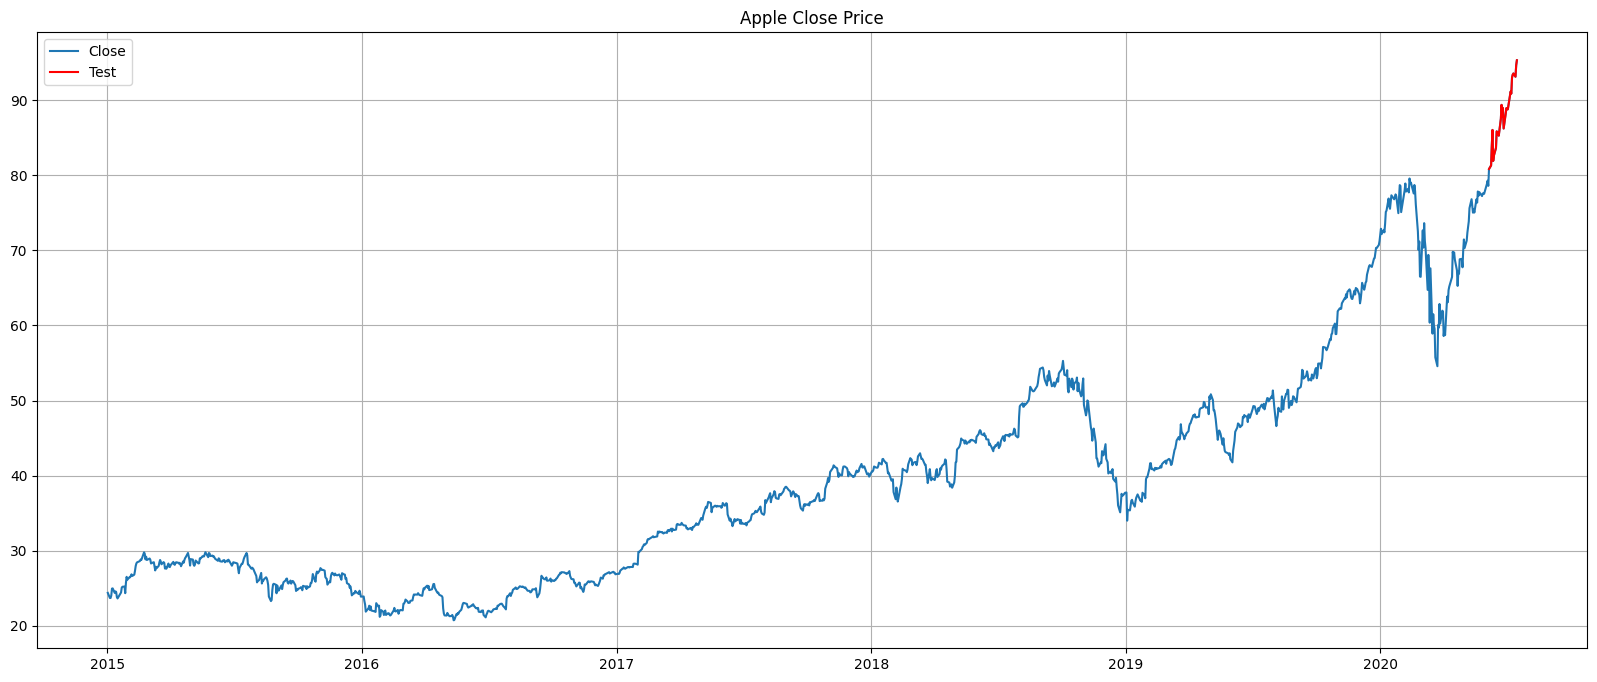

In [266]:
plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df_test['Date'], df_test['Close'], label='Test', color='red')
plt.title('Apple Close Price')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=0)
plt.grid()
plt.legend()
plt.show()

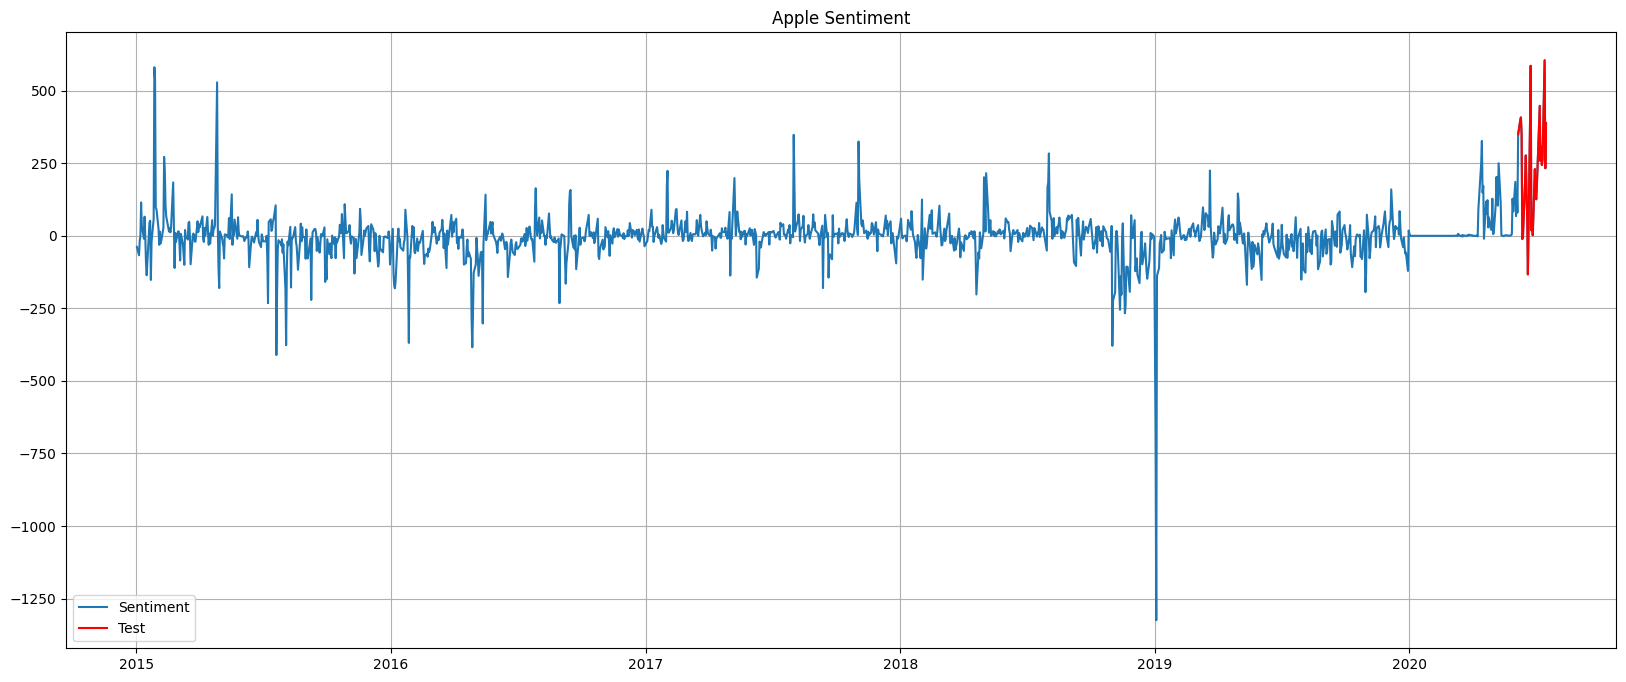

In [267]:
plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['Sentiment'], label='Sentiment')
plt.plot(df_test['Date'], df_test['Sentiment'], label='Test', color='red')
plt.title('Apple Sentiment')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=0)
plt.grid()
plt.legend()
plt.show()

## Predition models

We used several time series models in order to predict stock prices and sentiment.

### ARIMA

We started with ARIMA,  as it works well for univariate data, like stock prices.

We performed the auto arima to get the best p, q, d values for our model.

In [ ]:
from pmdarima import auto_arima

model = auto_arima(df['Close'], seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.86 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4814.618, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4167.924, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.25 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4812.618, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3956.727, Time=0.24 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3862.929, Time=0.35 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=3760.388, Time=0.33 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3744.793, Time=0.65 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.27 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.08 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=3742.793, Time=0.49 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=3758.388, Time=0.36 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=1.11 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=1.08 s

c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib

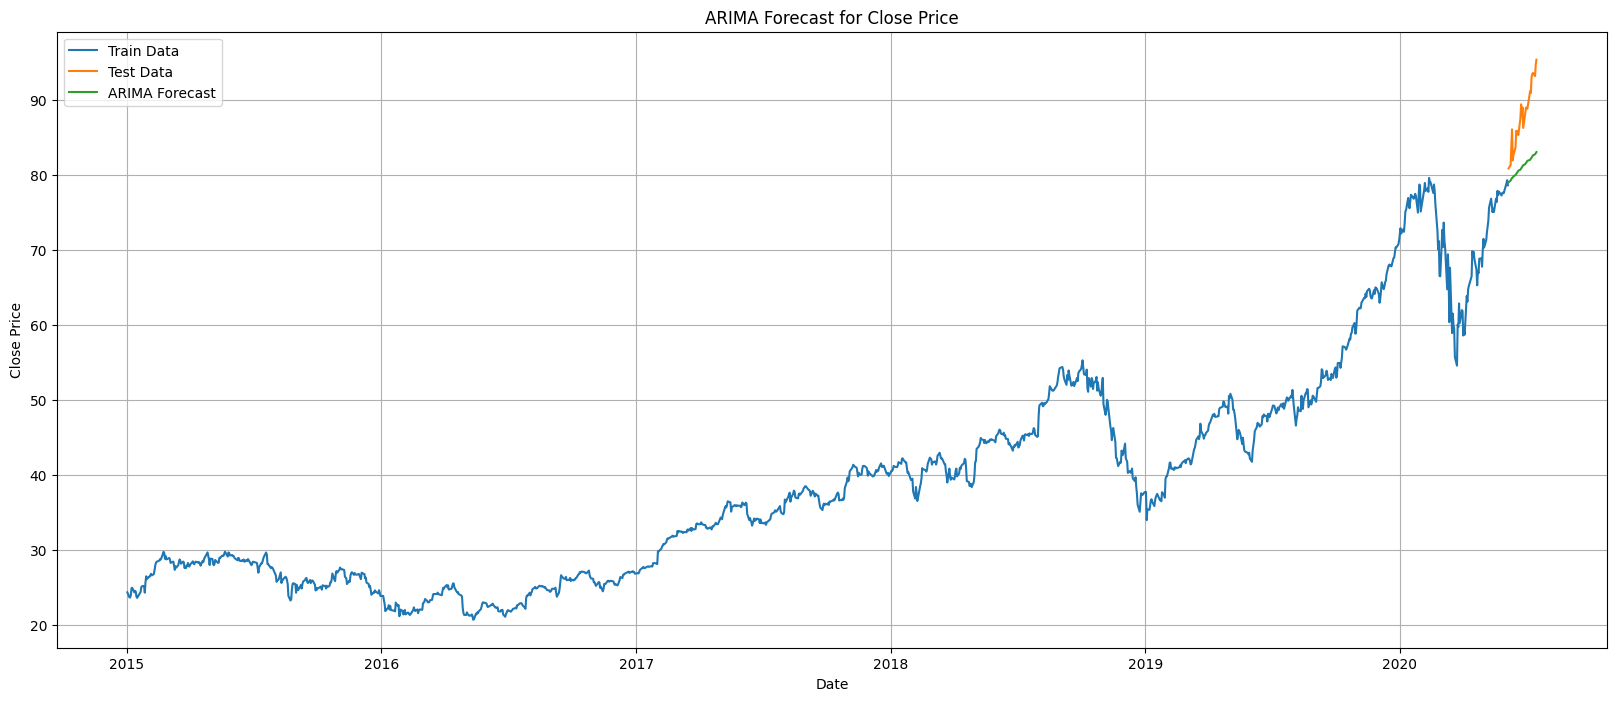

In [287]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


import matplotlib.pyplot as plt

model_arima = ARIMA(df_train['Close'], order=(5, 2, 0)) 
model_arima_fit = model_arima.fit()

#print(model_arima_fit.summary())

forecast_arima = model_arima_fit.forecast(steps=len(df_test))

# Wizualizacja wyników
plt.figure(figsize=(20, 8))
plt.plot(df_train['Date'], df_train['Close'], label="Train Data")
plt.plot(df_test['Date'], df_test['Close'], label="Test Data")
plt.plot(df_test['Date'], forecast_arima, label="ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.title("ARIMA Forecast for Close Price")
plt.grid()
plt.show()


As it's hard to analyse the plot in its regular size, we also plotted just the test and predicted values.

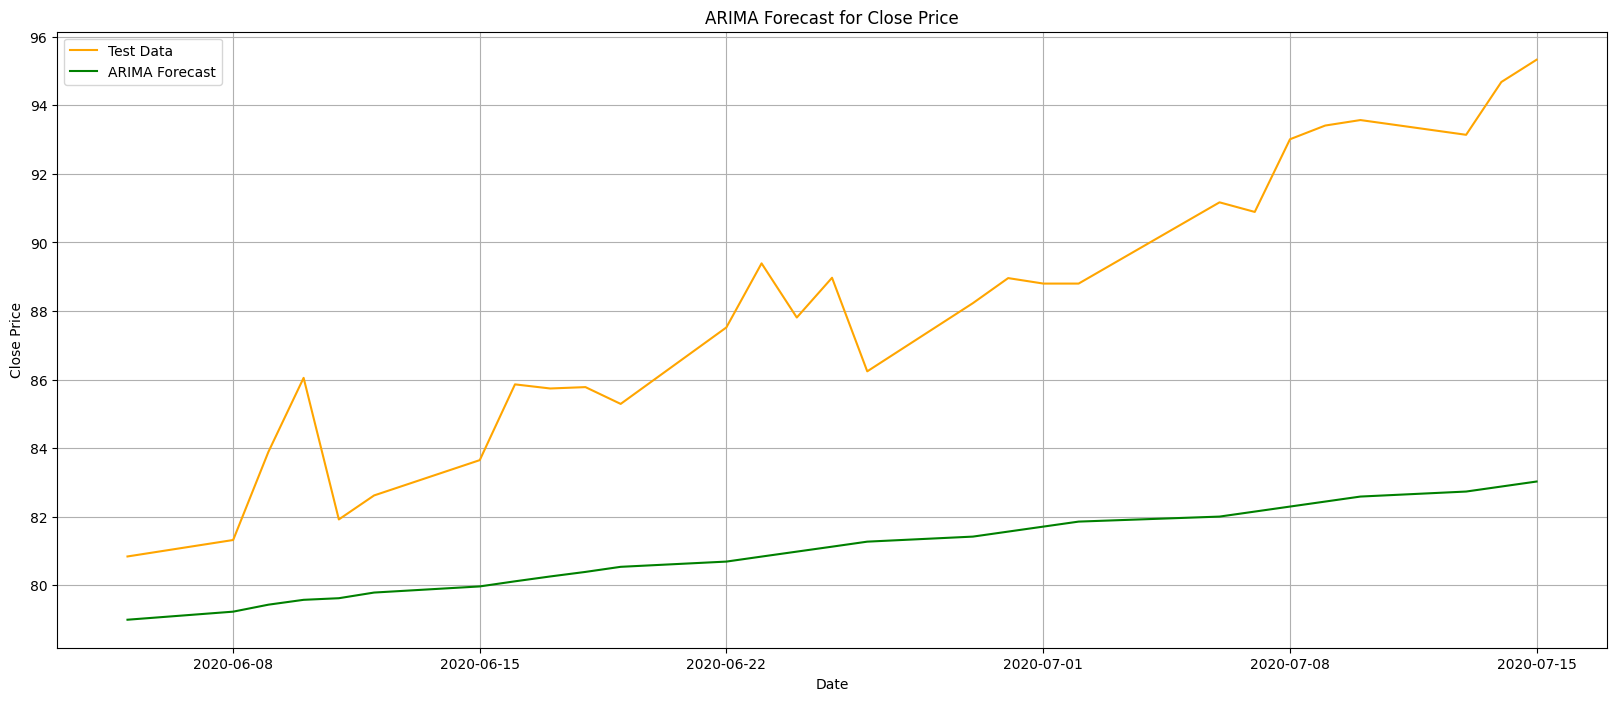

In [289]:
plt.figure(figsize=(20, 8))
plt.plot(df_test['Date'], df_test['Close'], label="Test Data", color='orange')
plt.plot(df_test['Date'], forecast_arima, label="ARIMA Forecast", color='green')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.title("ARIMA Forecast for Close Price")
plt.grid()
plt.show()


We could see that the results are very good, but we also checked the values of MAE and RMSE.

In [136]:
mae = mean_absolute_error(df_test['Close'], forecast_arima)
print(f'MAE: {mae}')

rmse = np.sqrt(mean_squared_error(df_test['Close'], forecast_arima))
print(f'RMSE: {rmse}')

MAE: 1.6999061416759669
RMSE: 2.0336099376751195


### ARIMAX

Then, we used ARIMAX in order to include the news as an external factor. We can check if there is actually any influence of the sentiment on the stock market.

We did not use the SARIMAX, as the stock data is not seasonal.

c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1364
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -1755.615
Date:                Tue, 17 Dec 2024   AIC                           3525.230
Time:                        16:09:00   BIC                           3561.747
Sample:                             0   HQIC                          3538.899
                               - 1364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0024      0.000     13.893      0.000       0.002       0.003
ar.L1         -1.0353      0.012    -89.572      0.000      -1.058      -1.013
ar.L2         -0.7912      0.016    -47.976      0.0

c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


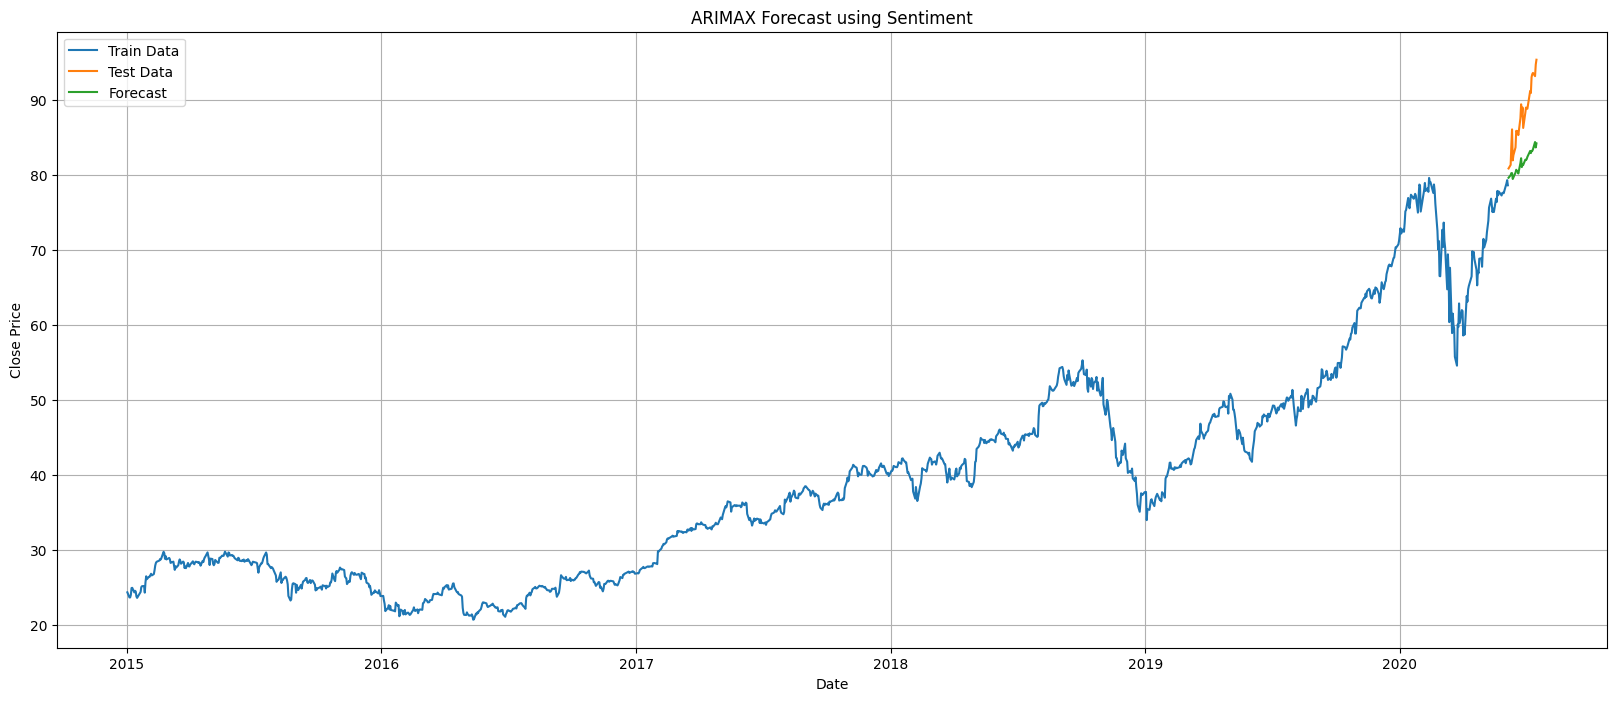

In [291]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Tworzenie szeregów czasowych z ARIMAX
# Sentiment traktowany jako zmienna objaśniająca (exogenous)
X = df_train['Sentiment'].values.reshape(-1, 1)  # Sentyment jako zmienna objaśniająca
model = ARIMA(df_train['Close'], exog=X, order=(5, 2, 0))  # ARIMAX model

# Dopasowanie modelu
model_fit = model.fit()

# Podsumowanie wyników
print(model_fit.summary())

# Prognoza na podstawie danych testowych
forecast_sentiment = df_test['Sentiment'].values.reshape(-1, 1)  # Testowe wartości sentymentu
forecast_arimax = model_fit.forecast(steps=len(df_test), exog=forecast_sentiment)

# Wizualizacja wyników
plt.figure(figsize=(20, 8))
plt.plot(df_train['Date'], df_train['Close'], label="Train Data")
plt.plot(df_test['Date'], df_test['Close'], label="Test Data")
plt.plot(df_test['Date'], forecast_arimax, label="Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.title("ARIMAX Forecast using Sentiment")
plt.grid()
plt.show()


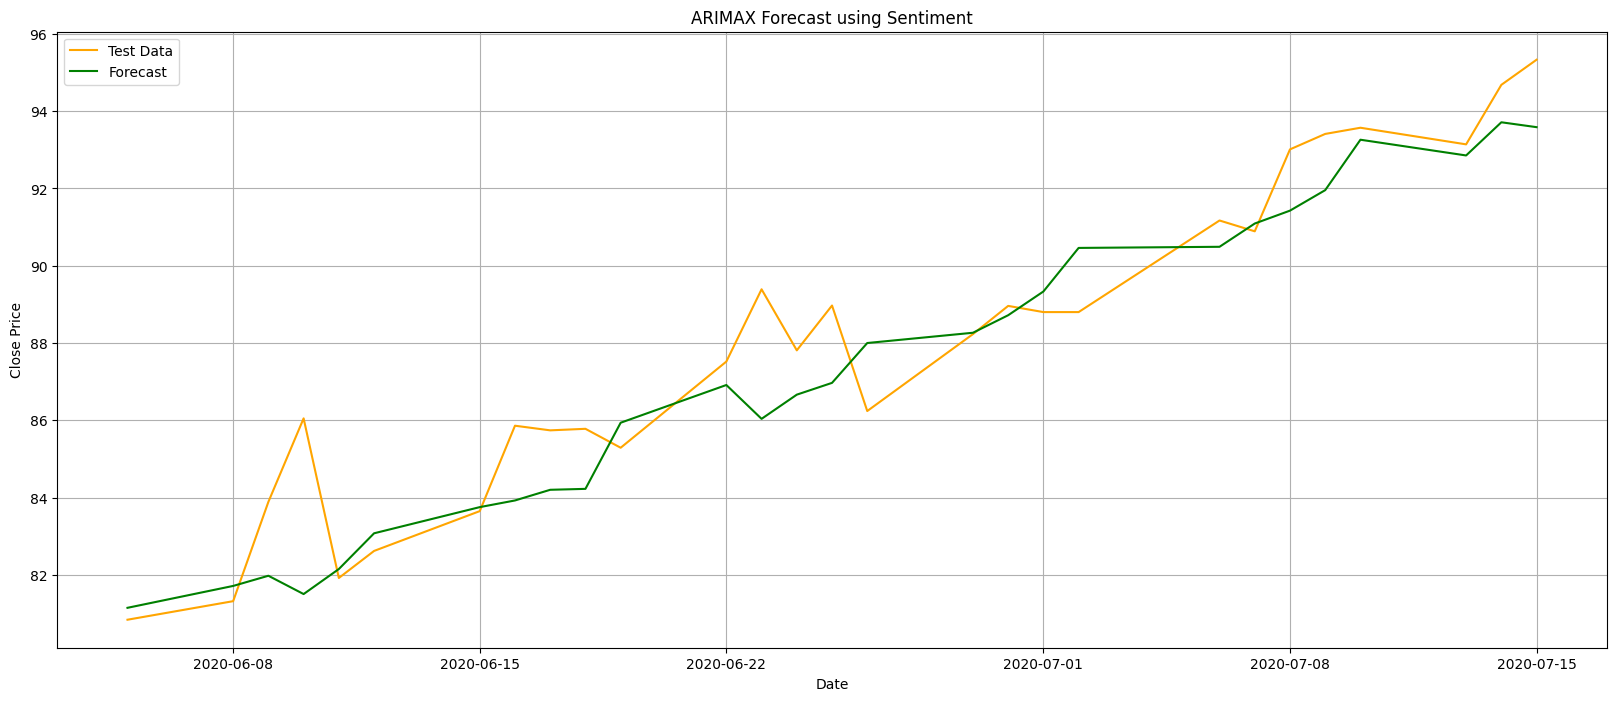

In [290]:
plt.figure(figsize=(20, 8))
plt.plot(df_test['Date'], df_test['Close'], label="Test Data", color='orange')
plt.plot(df_test['Date'], forecast_arimax, label="Forecast", color='green')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.title("ARIMAX Forecast using Sentiment")
plt.grid()
plt.show()


We can see that model fits our data very well.

In [142]:
# calculate the mean absolute error
mae = mean_absolute_error(df_test['Close'], forecast_arimax)
print(f'MAE: {mae}')

# calculate rmse
rmse = np.sqrt(mean_squared_error(df_test['Close'], forecast_arimax))
print(f'RMSE: {rmse}')

MAE: 1.2719825987897013
RMSE: 1.5706013505357448


And the errors are relatively small.

### MAX

Finally, we used the MAX model and checked the hipotesis both ways. Firts, to see if the stock influences the sentiment and the other one, checking if the sentiment influences the stock.

##### Does the sentiment ifluence the stock?

In [144]:
# get the p, d, q values automatically
model = auto_arima(df['Close'], exogenous=df['Sentiment'].values.reshape(-1, 1), seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4814.618, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4167.924, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4812.618, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3956.727, Time=0.33 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3862.929, Time=0.54 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=3760.388, Time=0.38 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3744.793, Time=0.48 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.94 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.97 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=3742.793, Time=0.48 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=3758.388, Time=0.32 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=1.84 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.71 s

c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1364
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -1755.615
Date:                Tue, 17 Dec 2024   AIC                           3525.230
Time:                        16:31:09   BIC                           3561.747
Sample:                             0   HQIC                          3538.899
                               - 1364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0024      0.000     13.893      0.000       0.002       0.003
ar.L1         -1.0353      0.012    -89.572      0.000      -1.058      -1.013
ar.L2         -0.7912      0.016    -47.976      0.0

c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


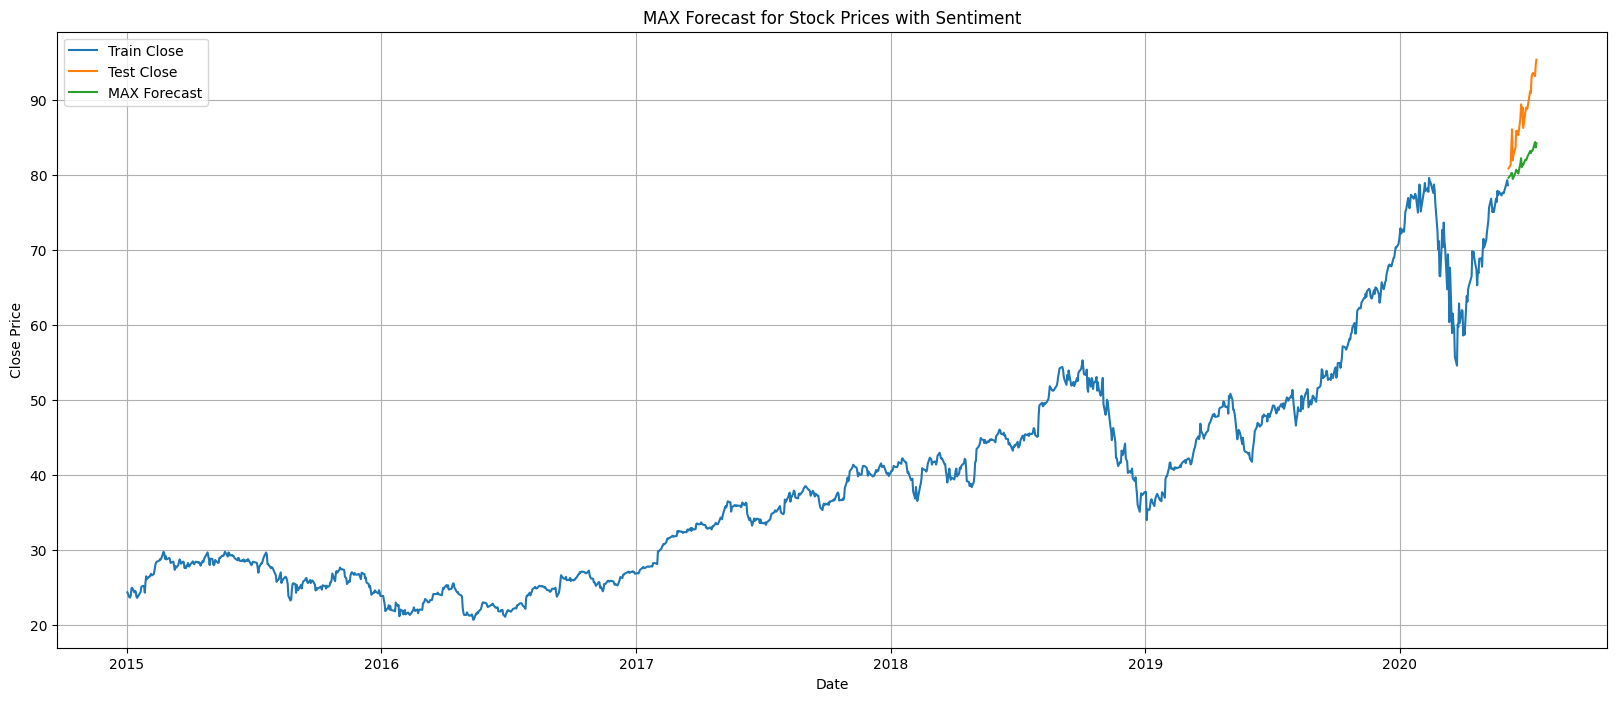

In [300]:
from statsmodels.tsa.arima.model import ARIMA

# Zmienna zależna: wartości giełdowe
y_close = df_train['Close']  

# Zmienna zewnętrzna: sentyment wiadomości
X_sentiment = df_train[['Sentiment']].values  

# Dopasowanie modelu ARIMAX (MAX)
model_max = ARIMA(y_close, exog=X_sentiment, order=(5, 2, 0))
model_max_fit = model_max.fit()

# Podsumowanie modelu
print(model_max_fit.summary())

# Prognozowanie na zbiorze testowym
X_test_sentiment = df_test[['Sentiment']].values
forecast_close = model_max_fit.forecast(steps=len(df_test), exog=X_test_sentiment)

# Wizualizacja wyników
plt.figure(figsize=(20, 8))
plt.plot(df_train['Date'], df_train['Close'], label="Train Close")
plt.plot(df_test['Date'], df_test['Close'], label="Test Close")
plt.plot(df_test['Date'], forecast_close, label="MAX Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.title("MAX Forecast for Stock Prices with Sentiment")
plt.show()

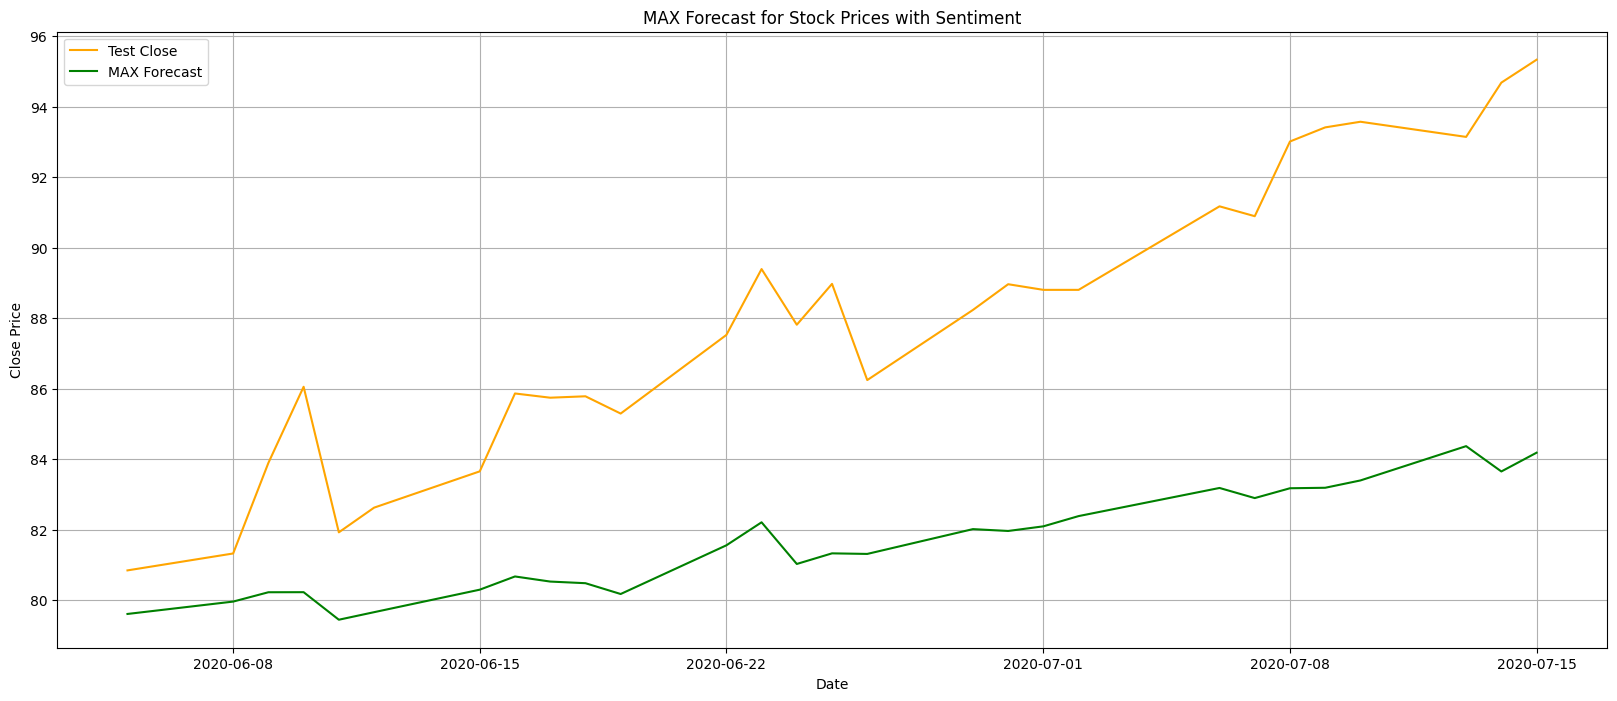

In [299]:
plt.figure(figsize=(20, 8))
plt.plot(df_test['Date'], df_test['Close'], label="Test Close", color='orange')
plt.plot(df_test['Date'], forecast_close, label="MAX Forecast", color='green')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.title("MAX Forecast for Stock Prices with Sentiment")
plt.show()

In [286]:
# calculate the mean absolute error
mae = mean_absolute_error(df_test['Sentiment'], forecast_sentiment)
print(f'MAE: {mae}')

rmse = np.sqrt(mean_squared_error(df_test['Sentiment'], forecast_sentiment))
print(f'RMSE: {rmse}')

MAE: 131.07648803108142
RMSE: 165.28663675058243


The error values are significantly higher compared to other models, but it's important to note that the seasonal factor has not been taken into account for in this case.

##### Does the stock influence the sentiment?

In [295]:
# get the p, d, q values automatically
model = auto_arima(df['Sentiment'], exogenous=df['Close'].values.reshape(-1, 1), seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15968.763, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16409.594, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16333.645, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16151.700, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16407.611, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15968.599, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15972.491, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15980.576, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15969.361, Time=0.92 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15967.596, Time=0.57 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=15969.157, Time=0.70 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=15969.151, Time=1.48 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=15966.223, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=15971.098, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0

c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sentiment   No. Observations:                 1364
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -7721.896
Date:                Tue, 17 Dec 2024   AIC                          15453.792
Time:                        16:30:18   BIC                          15479.879
Sample:                             0   HQIC                         15463.557
                               - 1364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.9862      1.198      4.998      0.000       3.639       8.333
ma.L1         -0.5119      0.011    -46.286      0.000      -0.534      -0.490
ma.L2         -0.3239      0.020    -16.227      0.0

c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\48726\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


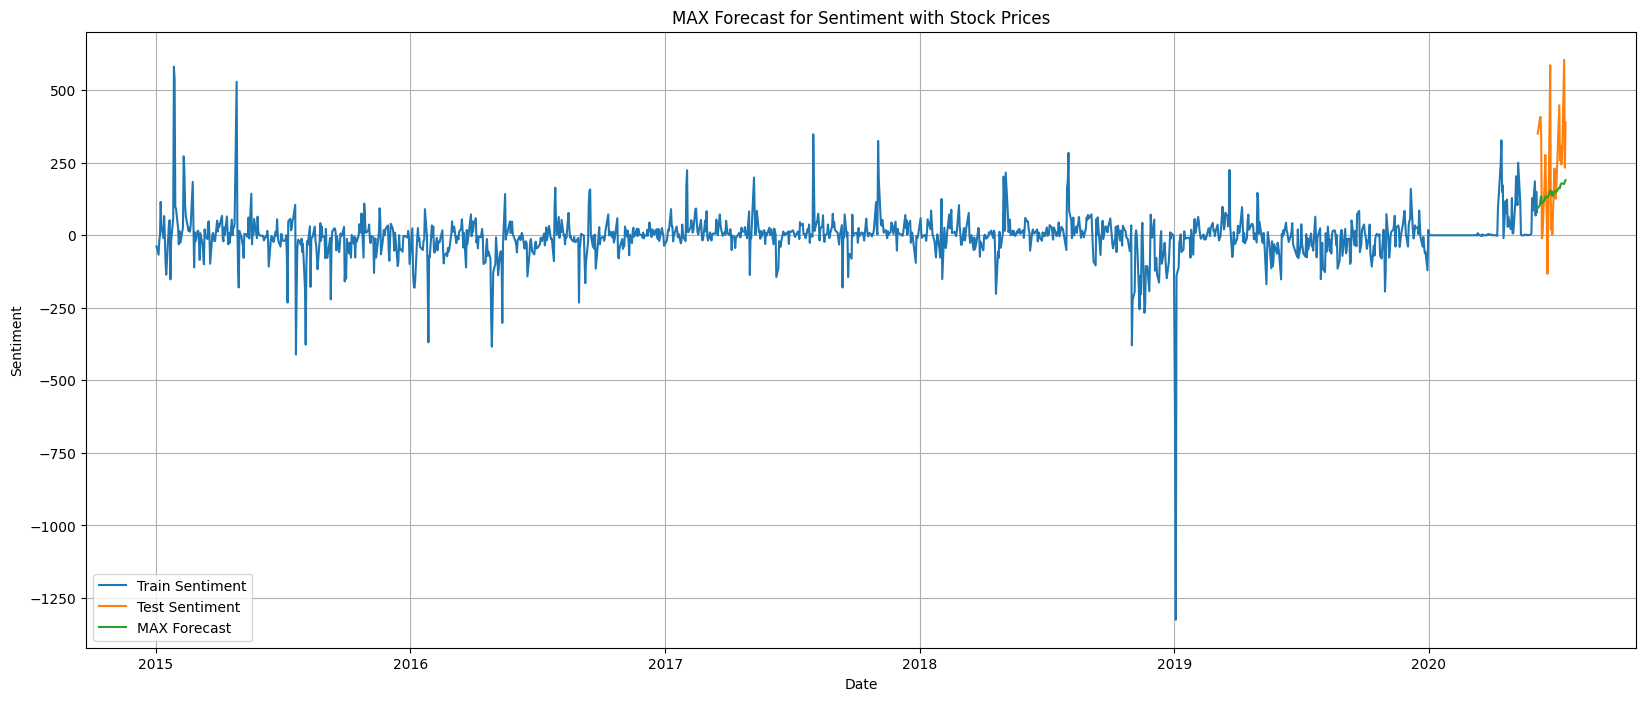

In [296]:
from statsmodels.tsa.arima.model import ARIMA

# Zmienna zależna: sentyment wiadomości
y_sentiment = df_train['Sentiment']  

# Zmienna zewnętrzna: wartości giełdowe (Close)
X_close = df_train[['Close']].values  

# Dopasowanie modelu MAX (ARIMAX)
model_max = ARIMA(y_sentiment, exog=X_close, order=(0, 1, 3))
model_max_fit = model_max.fit()

# Podsumowanie modelu
print(model_max_fit.summary())

# Prognozowanie sentymentu na zbiorze testowym
X_test_close = df_test[['Close']].values
forecast_sentiment = model_max_fit.forecast(steps=len(df_test), exog=X_test_close)

# Wizualizacja wyników
plt.figure(figsize=(20, 8))
plt.plot(df_train['Date'], df_train['Sentiment'], label="Train Sentiment")
plt.plot(df_test['Date'], df_test['Sentiment'], label="Test Sentiment")
plt.plot(df_test['Date'], forecast_sentiment, label="MAX Forecast")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.legend()
plt.grid()
plt.title("MAX Forecast for Sentiment with Stock Prices")
plt.show()

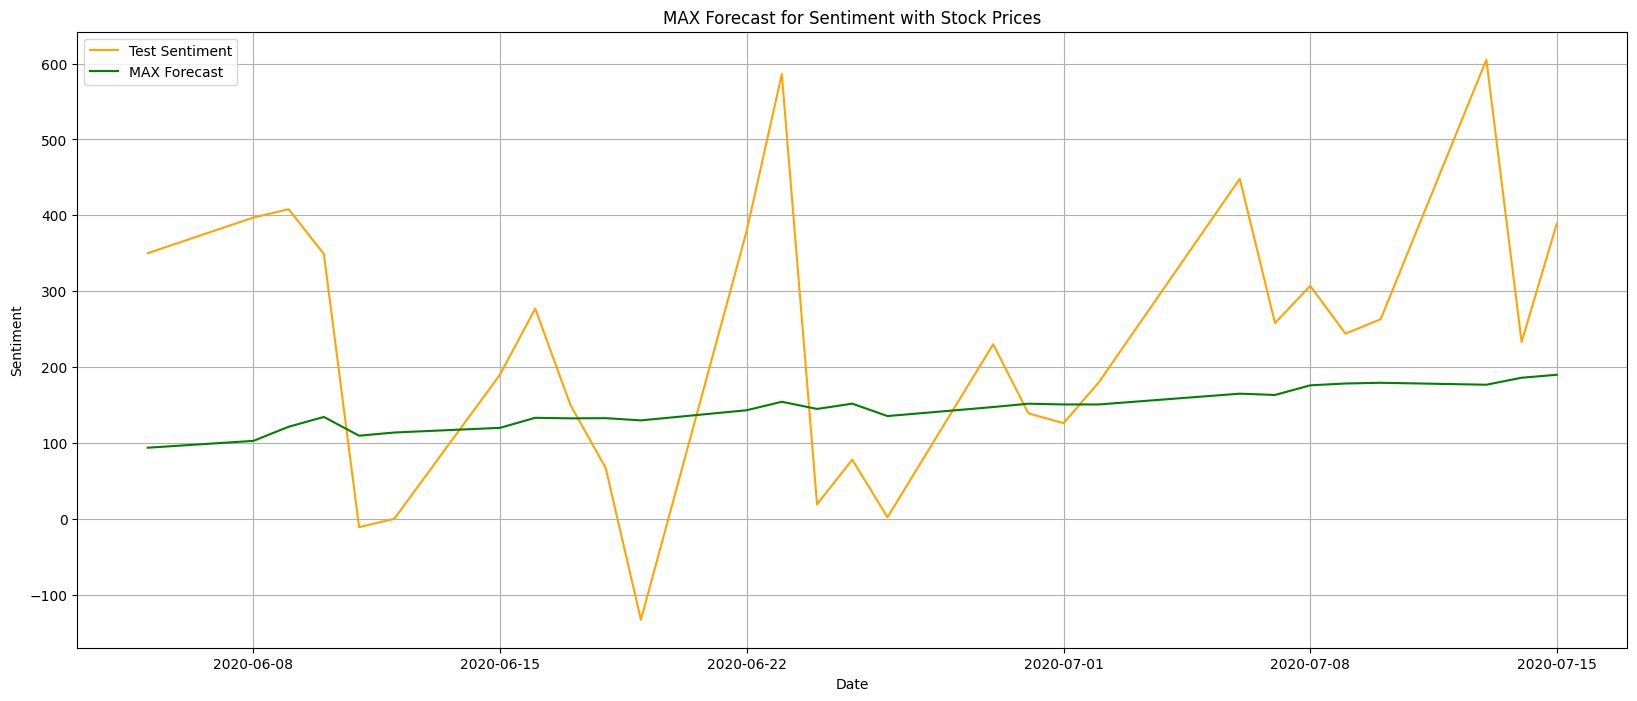

In [297]:
plt.figure(figsize=(20, 8))
plt.plot(df_test['Date'], df_test['Sentiment'], label="Test Sentiment", color='orange')
plt.plot(df_test['Date'], forecast_sentiment, label="MAX Forecast", color='green')
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.legend()
plt.grid()
plt.title("MAX Forecast for Sentiment with Stock Prices")
plt.show()

In [298]:
# get the errors
mae = mean_absolute_error(df_test['Sentiment'], forecast_sentiment)
print(f'MAE: {mae}')

rmse = np.sqrt(mean_squared_error(df_test['Sentiment'], forecast_sentiment))
print(f'RMSE: {rmse}')

MAE: 154.61593443533417
RMSE: 192.7185819574594


In this case, the results are even worse, even though we used the best model, according to auto arima.

## Dickey-Fuller Test

We performed the Dickey-Fuller Test in order to confirm that the stock values for Apple are non-stationary.

In [294]:
from statsmodels.tsa.stattools import adfuller

series = df['Close']

result = adfuller(series, autolag='AIC')

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

if result[1] <= 0.05:
    print("\nThe data is stationary (reject the null hypothesis H0).")
else:
    print("\nThe data is non-stationary (fail to reject the null hypothesis H0).")


ADF Statistic: 1.1441969186809056
p-value: 0.9955767221002424
Critical Values:
   1%: -3.4351217173485766
   5%: -2.8636473597946974
   10%: -2.567891956216259

The data is non-stationary (fail to reject the null hypothesis H0).


The results of the Dickey-Fuller test confirm that the data is non-stationary, as the p-value (0.999) is significantly greater than the threshold of 0.05. 

Additionally, the ADF statistic (2.43) is higher than all critical values (-3.43, -2.86, -2.57), indicating a failure to reject the null hypothesis of non-stationarity.

## Correlation bewteen the sentiment and stock values

In [303]:
# calculate the correlation between the close price and the sentiment
correlation = df['Close'].corr(df['Sentiment'])
print(f"Correlation between Close Price and Sentiment: {correlation}")

Correlation between Close Price and Sentiment: 0.2617993215042127


The correlation value indicates a weak positive relationship, suggesting that sentiment has a limited influence on the close price.

We can confirm that using the scatterplot.

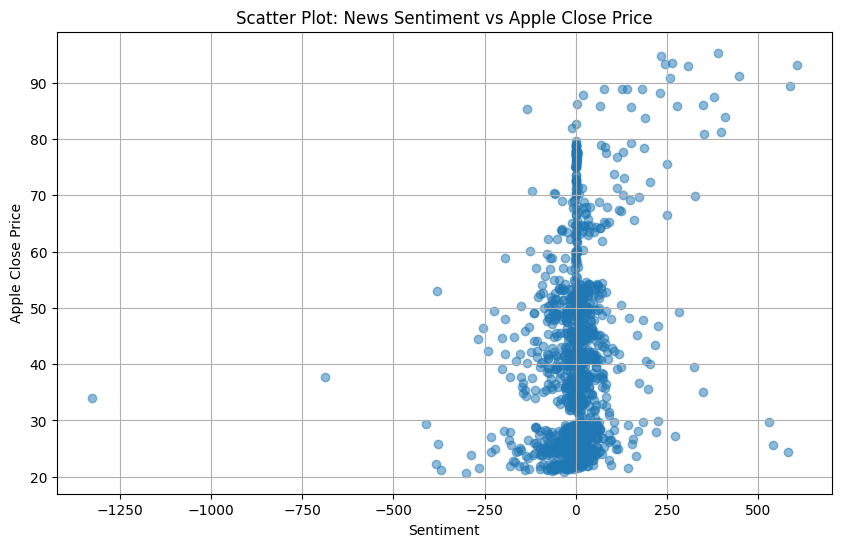

In [324]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Sentiment'], df['Close'], alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Apple Close Price')
plt.title('Scatter Plot: News Sentiment vs Apple Close Price')
plt.grid()
plt.show()

Apart from a few exceptions, the correlation between these values is close to 0.

### Pearson Correlation Test

In [331]:
from scipy.stats import pearsonr

print("Null Hypothesis (H₀): There is no correlation between Close Price and Sentiment.")
print("Alternative Hypothesis (H₁): There is a correlation between Close Price and Sentiment.\n")

correlation, p_value = pearsonr(df['Close'], df['Sentiment'])

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("\nResult: We reject the null hypothesis (H₀).")
    print("Conclusion: There is a statistically significant correlation between Close Price and Sentiment.")
else:
    print("\nResult: We fail to reject the null hypothesis (H₀).")
    print("Conclusion: There is no statistically significant correlation between Close Price and Sentiment.")


Null Hypothesis (H₀): There is no correlation between Close Price and Sentiment.
Alternative Hypothesis (H₁): There is a correlation between Close Price and Sentiment.

Pearson correlation coefficient: 0.2616026585249409
P-value: 3.364741684959896e-23

Result: We reject the null hypothesis (H₀).
Conclusion: There is a statistically significant correlation between Close Price and Sentiment.


Even though the correlation is rather small, we can see that while using the pearson test, the null hipotesis was rejected, meaning that there is a signifficant correlation between news setiment and Apple stock values.

We also tried to check the correlation of the best stock with the best sentiment, as well as the worst stock with the worst sentiment.

In [328]:
from scipy.stats import pearsonr

upper_percentile_sentiment = df['Sentiment'].quantile(0.9)
lower_percentile_sentiment = df['Sentiment'].quantile(0.1)

upper_percentile_close = df['Close'].quantile(0.9)
lower_percentile_close = df['Close'].quantile(0.1)

best_sentiment = df[df['Sentiment'] >= upper_percentile_sentiment]
worst_sentiment = df[df['Sentiment'] <= lower_percentile_sentiment]
worst_sentiment = worst_sentiment[:-1]

best_close = df[df['Close'] >= upper_percentile_close]
worst_close = df[df['Close'] <= lower_percentile_close]

cor_1, p_val_1 = pearsonr(best_sentiment['Close'], best_sentiment['Sentiment'])

cor_2, p_val_2 = pearsonr(worst_close['Close'], worst_sentiment['Sentiment'])

print("\nTest 1: Good news result in good market.\n")
print(f"Correlation: {cor_1}, P-value: {p_val_1}")
if p_val_1 < 0.05:
    print("Significant correlation: good sentiment influences good market.")
else:
    print("No significant correlation.")

print("\nTest 2: Bad news result in worse market.\n")
print(f"Correlation: {cor_2}, P-value: {p_val_2}")
if p_val_2 < 0.05:
    print("Significant correlation: bad news correlates with bad market.")
else:
    print("No significant correlation.")



Test 1: Good news result in good market.

Correlation: 0.3321134616757684, P-value: 6.103279810010699e-05
Significant correlation: good sentiment influences good market.

Test 2: Bad news result in worse market.

Correlation: 0.03063528671017588, P-value: 0.71935859618646
No significant correlation.
